In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [5]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [6]:
import pandas as pd
from PIL import Image as ima
import warnings

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [9]:
df = pd.read_csv('/home/yelhe/script/mt/input/df_all_new1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               3934 non-null   int64  
 1   gmedian            3934 non-null   float64
 2   rmedian            3934 non-null   float64
 3   bmedian            3934 non-null   float64
 4   gmean              3934 non-null   float64
 5   rmean              3934 non-null   float64
 6   bmean              3934 non-null   float64
 7   gstd               3934 non-null   float64
 8   rstd               3934 non-null   float64
 9   bstd               3934 non-null   float64
 10  gq25               3934 non-null   float64
 11  gq75               3934 non-null   float64
 12  rq25               3934 non-null   float64
 13  rq75               3934 non-null   float64
 14  bq25               3934 non-null   float64
 15  bq75               3934 non-null   float64
 16  cdmean             3934 

In [10]:
df = df.replace({True:1, False:0})

In [11]:
df['label'].unique()

array(['s', 'pa', 'p', 'r', 'b', 'bi', 'o', 't', 'v', 'ct', 'h', 'curb',
       'ep', 'm', 'pm', 'vp', 'sw', 'rs', 'rgs', 'sl', 'mo', 'bp', 'mb',
       'bw', 'ra', 'train', 'bus', 'ts', 'tram', 'rp', 'tb', 'lp', 'ri',
       'tl', 'bl', 'z', 'sp', 'wp', 'sh', 'st', 'li', 'tc', 'ch', 'bip',
       'rb', 'tlp'], dtype=object)

### Library Preparation 

In [12]:
# Importing Modules

from sklearn import * 
from sklearn import datasets
from sklearn.datasets import load_digits

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn

#### For entropy calculation - Whole scene

In [18]:
df['label_group'].unique()

array(['sky', 'infrastructure', 'vegetation', 'building',
       'means_of_transportation', 'other', 'curb'], dtype=object)

In [19]:
df.groupby(['label_group']).size().reset_index().rename(columns={0:'count'})


,label_group,count
0,building,401
1,curb,49
2,infrastructure,717
3,means_of_transportation,189
4,other,1822
5,sky,112
6,vegetation,644


In [20]:
df_e = df

In [21]:
# df_ = df_new.drop(['area', 'ed', 'perimeter'], axis=1)
le_e = LabelEncoder()
df_e['labelgroup_index'] = le_e.fit_transform(df_e['label_group'])
y_e = df_e['label_group']
y_e = le_e.transform(y_e)
df_e.groupby(['label_group','labelgroup_index']).size().reset_index().rename(columns={0:'count'})

,label_group,labelgroup_index,count
0,building,0,401
1,curb,1,49
2,infrastructure,2,717
3,means_of_transportation,3,189
4,other,4,1822
5,sky,5,112
6,vegetation,6,644


In [22]:
dfe = df_e
dfe = dfe.drop(['label', 'Nr', 'label_group', 'mask', 'labelgroup_index'], axis = 1)

In [23]:
# Remove the variables that are not that important
dfe = dfe.drop(['isconvex', 'is_cen_inside', 'is_mce_inside'], axis = 1)

In [24]:
dfe.columns

Index(['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd',
       'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75',
       'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity',
       'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed',
       'ratio_ell', 'perimeter', 'leftm', 'rightm', 'topm', 'bottomm'],
      dtype='object')

In [25]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            3934 non-null   float64
 1   rmedian            3934 non-null   float64
 2   bmedian            3934 non-null   float64
 3   gmean              3934 non-null   float64
 4   rmean              3934 non-null   float64
 5   bmean              3934 non-null   float64
 6   gstd               3934 non-null   float64
 7   rstd               3934 non-null   float64
 8   bstd               3934 non-null   float64
 9   gq25               3934 non-null   float64
 10  gq75               3934 non-null   float64
 11  rq25               3934 non-null   float64
 12  rq75               3934 non-null   float64
 13  bq25               3934 non-null   float64
 14  bq75               3934 non-null   float64
 15  cdmean             3934 non-null   float64
 16  cdstd              3934 

In [26]:
Xe = dfe
ye = y_e

X_train, X_test, y_train, y_test = train_test_split(Xe, ye, test_size = 0.3, random_state = 8)

In [27]:
X_train.shape, X_test.shape

((2753, 32), (1181, 32))

In [96]:
rfe = joblib.load("my_random_forest_2_whole7.joblib")
# rfe = RandomForestClassifier(n_estimators = 10, random_state = 8)
rfe.fit(X_train, y_train)
y_pred_rfe = rfe.predict(X_test)

In [97]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rfe.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rfe))

Train data accuracy: 0.9960043588812205
Test data accuracy: 0.7832345469940728


[[ 71   0   1   0  30   0   1]
 [  0   6   1   0   0   0   0]
 [  1   3 159   1  51   0   1]
 [  3   0   0  23  34   0   0]
 [ 11   0  30   3 487   0  18]
 [  3   0   1   0   3  30   0]
 [  9   0   0   0  51   0 149]]


<Figure size 1200x800 with 0 Axes>

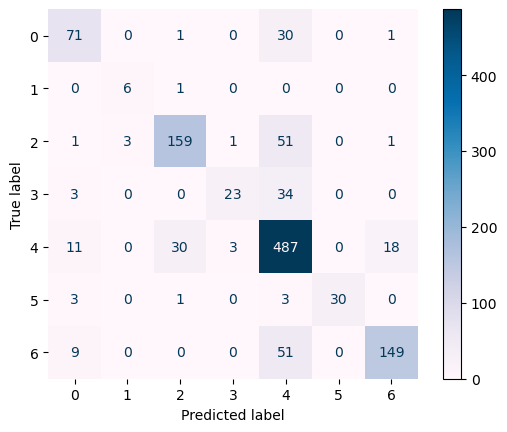

In [99]:
plt.figure(figsize = (12,8))
confusion_matrix_rfe = metrics.confusion_matrix(y_test, y_pred_rfe)
print(confusion_matrix_rfe)
cm_display_rfe = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfe)
cm_display_rfe.plot(cmap = 'PuBu')
plt.box(False)
plt.savefig('cm_1_entropywhole.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [100]:
acc_rfe = metrics.accuracy_score(y_test, y_pred_rfe)
print('accuracy', acc_rfe)

pre_rfe = metrics.precision_score(y_test, y_pred_rfe, average = None)
print('precision', pre_rfe)

pre_rfe0 = metrics.precision_score(y_test, y_pred_rfe, average = 'micro')
print('precision_micro', pre_rfe0)

pre_rfe1 = metrics.precision_score(y_test, y_pred_rfe, average = 'weighted')
print('precision_weighted', pre_rfe1)

pre_rfe2 = metrics.precision_score(y_test, y_pred_rfe, average = 'macro')
print('precision_macro', pre_rfe2)

senrec_rfe = metrics.recall_score(y_test, y_pred_rfe, average = None)
print('sensitivity recall', senrec_rfe)

senrec_rfe0 = metrics.recall_score(y_test, y_pred_rfe, average = 'micro')
print('sensitivity recall micro', senrec_rfe0)

senrec_rfe1 = metrics.recall_score(y_test, y_pred_rfe, average = 'weighted')
print('sensitivity recall weighted', senrec_rfe1)

senrec_rfe2 = metrics.recall_score(y_test, y_pred_rfe, average = 'macro')
print('sensitivity recall macro', senrec_rfe2)

f1_rfe = metrics.f1_score(y_test, y_pred_rfe, average = None)
print('f1 score', f1_rfe)

f1_rfe0 = metrics.f1_score(y_test, y_pred_rfe, average = 'micro')
print('f1 score micro', f1_rfe0)

f1_rfe1 = metrics.f1_score(y_test, y_pred_rfe, average = 'weighted')
print('f1 score weighted', f1_rfe1)

f1_rfe2 = metrics.f1_score(y_test, y_pred_rfe, average = 'macro')
print('f1 score macro', f1_rfe2)


mcc_rfe = metrics.matthews_corrcoef(y_test, y_pred_rfe)
print('mcc score', mcc_rfe)

ka_rfe = metrics.cohen_kappa_score(y_test, y_pred_rfe)
print('kappa', ka_rfe)



accuracy 0.7832345469940728
precision [0.7244898  0.66666667 0.828125   0.85185185 0.74237805 1.
 0.8816568 ]
precision_micro 0.7832345469940728
precision_weighted 0.7943328092525036
precision_macro 0.8135954525644431
sensitivity recall [0.68932039 0.85714286 0.73611111 0.38333333 0.8870674  0.81081081
 0.71291866]
sensitivity recall micro 0.7832345469940728
sensitivity recall weighted 0.7832345469940728
sensitivity recall macro 0.7252435080426893
f1 score [0.70646766 0.75       0.77941176 0.52873563 0.80829876 0.89552239
 0.78835979]
f1 score micro 0.7832345469940728
f1 score weighted 0.7787898297922515
f1 score macro 0.7509708557410778
mcc score 0.6863822278598418
kappa 0.6800463946273667


In [192]:
pre_rfe_m = np.mean(pre_rfe)
senrec_rfe_m = np.mean(senrec_rfe)
f1_rfe_m = np.mean(f1_rfe)
print('mean precision', pre_rfe_m)
print('mean recall', senrec_rfe_m)
print('mean f1 score', f1_rfe_m)

mean precision 0.8135954525644431
mean recall 0.7252435080426893
mean f1 score 0.7509708557410778


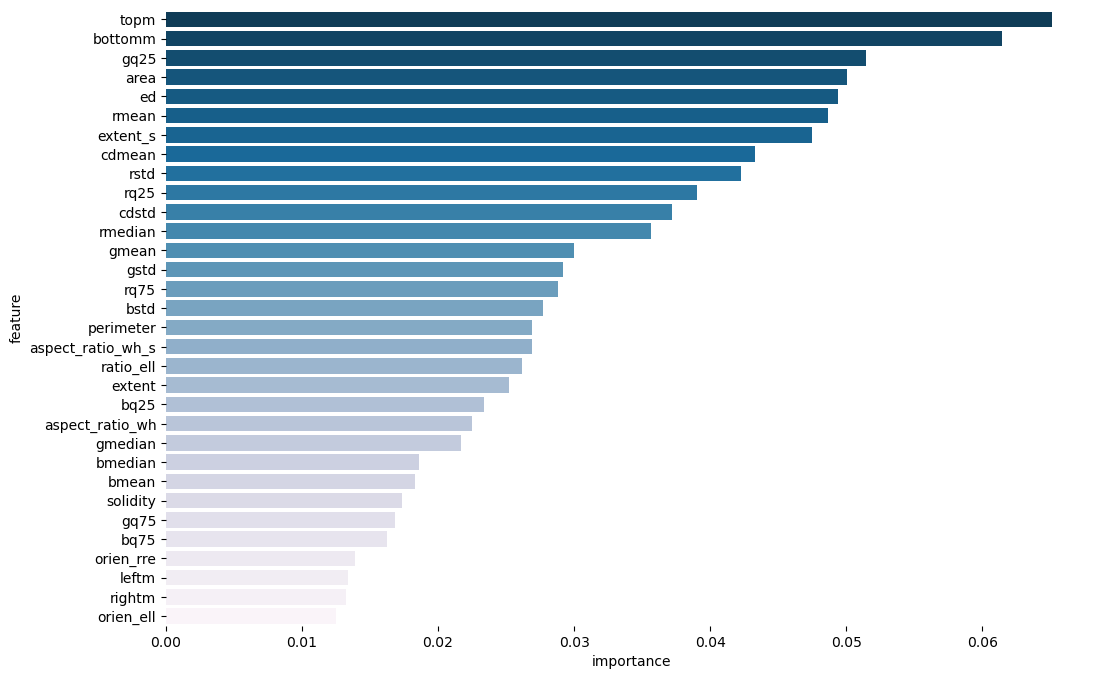

In [102]:
plt.figure(figsize = (12,8))
feature_name = list(dfe.columns.values.tolist())
importances = rfe.feature_importances_
df_rfe = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfe.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rfe['importances'], y = df_rfe['features'],
          palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
plt.savefig('rfimportance1_entropywhole.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [196]:
# joblib.dump(rfe, "my_random_forest_2_whole7.joblib")

['my_random_forest_2_whole7.joblib']

#### For entropy calculation - Road scene

In [81]:
dfr = df
#dfr.info()

In [82]:
dfr['label'].unique()

array(['s', 'pa', 'p', 'r', 'b', 'bi', 'o', 't', 'v', 'ct', 'h', 'curb',
       'ep', 'm', 'pm', 'vp', 'sw', 'rs', 'rgs', 'sl', 'mo', 'bp', 'mb',
       'bw', 'ra', 'train', 'bus', 'ts', 'tram', 'rp', 'tb', 'lp', 'ri',
       'tl', 'bl', 'z', 'sp', 'wp', 'sh', 'st', 'li', 'tc', 'ch', 'bip',
       'rb', 'tlp'], dtype=object)

In [83]:
dfr['label_group'].unique()

array(['sky', 'infrastructure', 'vegetation', 'building',
       'means_of_transportation', 'other', 'curb'], dtype=object)

In [84]:
dfin = dfr.loc[(dfr['label_group'] == 'infrastructure')|(dfr['label_group'] == 'curb')]

In [85]:
dfin = dfin.drop(['mask'], axis = 1)

In [86]:
dfin['label'].unique()

array(['pa', 'r', 'ct', 'curb', 'ep', 'm', 'sw', 'rs', 'rgs', 'sl', 'bw',
       'ra', 'ts', 'rp', 'tb', 'lp', 'tl', 'bl', 'z', 'wp', 'st', 'tc',
       'ch', 'rb', 'tlp'], dtype=object)

In [87]:
dfin.groupby(['label']).size().reset_index().rename(columns={0:'count'})

,label,count
0,bl,7
1,bw,9
2,ch,1
3,ct,12
4,curb,49
5,ep,18
6,lp,8
7,m,40
8,pa,92
9,r,125


In [88]:
dfin = dfin.assign(label_group_ground = 0)

In [89]:
dfin.loc[(dfin.label == 'r')|(dfin.label == 'rp'), 'label_group_ground'] = 'road'
dfin.loc[(dfin.label == 'bl'), 'label_group_ground'] = 'bike_lane'
dfin.loc[(dfin.label == 'pa'), 'label_group_ground'] = 'pavement'
dfin.loc[(dfin.label == 'curb'), 'label_group_ground'] = 'curb'
dfin.loc[(dfin.label == 'm'), 'label_group_ground'] = 'manhole'
dfin.loc[(dfin.label == 'z')|(dfin.label == 'bw')|(dfin.label == 'rgs')|(dfin.label == 'zp'),
         'label_group_ground'] = 'ground_sign'
dfin.loc[(dfin.label == 'ch')|(dfin.label == 'ep')|(dfin.label == 'lp')|
         (dfin.label == 'rb')|(dfin.label == 'rs')|(dfin.label == 'sl')|
         (dfin.label == 'tl')|(dfin.label == 'tc')|(dfin.label == 'sw')|
         (dfin.label == 'tb')|(dfin.label == 'ts')|(dfin.label == 'slp')| 
         (dfin.label == 'tlp')|(dfin.label == 'ra')|(dfin.label == 'st')|
         (dfin.label == 'wp')|(dfin.label == 'ct'), 'label_group_ground'] = 'other'



In [90]:
dfin['label_group_ground'].unique()

array(['pavement', 'road', 'other', 'curb', 'manhole', 'ground_sign',
       'bike_lane'], dtype=object)

In [91]:
dfin.groupby(['label_group_ground']).size().reset_index().rename(columns={0:'count'})

,label_group_ground,count
0,bike_lane,7
1,curb,49
2,ground_sign,217
3,manhole,40
4,other,226
5,pavement,92
6,road,135


In [92]:
dfi = dfin
le_i = LabelEncoder()
dfi['lgg_index'] = le_i.fit_transform(dfi['label_group_ground'])
y_i = dfi['label_group_ground']
y_i = le_i.transform(y_i)
dfi.groupby(['label_group_ground','lgg_index']).size().reset_index().rename(columns={0:'count'})

,label_group_ground,lgg_index,count
0,bike_lane,0,7
1,curb,1,49
2,ground_sign,2,217
3,manhole,3,40
4,other,4,226
5,pavement,5,92
6,road,6,135


In [93]:
dfi.columns

Index(['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd',
       'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75',
       'cdmean', 'cdstd', 'isconvex', 'area', 'aspect_ratio_wh_s', 'extent_s',
       'solidity', 'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed',
       'ratio_ell', 'perimeter', 'is_cen_inside', 'is_mce_inside', 'leftm',
       'rightm', 'topm', 'bottomm', 'label', 'Nr', 'label_group',
       'label_group_ground', 'lgg_index'],
      dtype='object')

In [94]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 766 entries, 1 to 3923
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gmedian             766 non-null    float64
 1   rmedian             766 non-null    float64
 2   bmedian             766 non-null    float64
 3   gmean               766 non-null    float64
 4   rmean               766 non-null    float64
 5   bmean               766 non-null    float64
 6   gstd                766 non-null    float64
 7   rstd                766 non-null    float64
 8   bstd                766 non-null    float64
 9   gq25                766 non-null    float64
 10  gq75                766 non-null    float64
 11  rq25                766 non-null    float64
 12  rq75                766 non-null    float64
 13  bq25                766 non-null    float64
 14  bq75                766 non-null    float64
 15  cdmean              766 non-null    float64
 16  cdstd       

In [95]:
dfi = dfi.drop(['label', 'Nr', 'label_group', 'label_group_ground', 'lgg_index',
                'isconvex', 'is_cen_inside', 'is_mce_inside'], axis = 1)

In [96]:
dfi.columns

Index(['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd',
       'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75',
       'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity',
       'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed',
       'ratio_ell', 'perimeter', 'leftm', 'rightm', 'topm', 'bottomm'],
      dtype='object')

In [166]:
Xi = dfi
yi = y_i

X_train1, X_test1, y_train1, y_test1 = train_test_split(Xi, yi, test_size = 0.45, random_state = 12)
X_train1.shape, X_test1.shape

((421, 32), (345, 32))

In [167]:
rfi = RandomForestClassifier(n_estimators = 12, random_state = 12)
# rfi = joblib.load("my_random_forest_3_ground7.joblib")
rfi.fit(X_train1, y_train1)
y_pred_rfi = rfi.predict(X_test1)

In [168]:
print("Train data accuracy:",accuracy_score(y_true = y_train1, y_pred = rfi.predict(X_train1)))
print("Test data accuracy:",accuracy_score(y_true = y_test1, y_pred = y_pred_rfi))

Train data accuracy: 0.997624703087886
Test data accuracy: 0.8202898550724638


[[  1   0   0   0   0   1   0]
 [  0  10   5   2   1   1   0]
 [  0   2  89   3   2   3   0]
 [  0   0   0  19   0   1   0]
 [  0   0   3   2 102   0   0]
 [  0   2   7   0   0  26   4]
 [  0   1   3   0   2  17  36]]


<Figure size 1200x800 with 0 Axes>

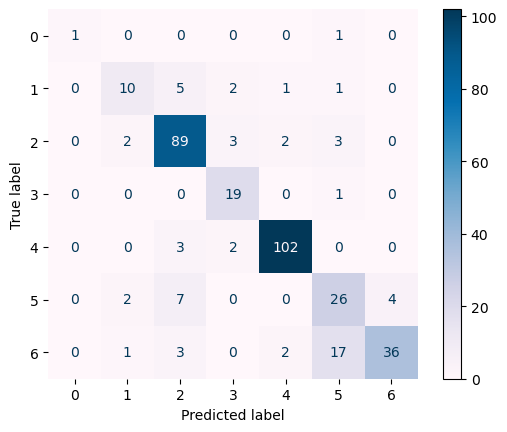

In [171]:
plt.figure(figsize = (12,8))
confusion_matrix_rfi = metrics.confusion_matrix(y_test1, y_pred_rfi)
print(confusion_matrix_rfi)
cm_display_rfi = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfi)
cm_display_rfi.plot(cmap = 'PuBu')
plt.box(False)
plt.savefig('cm_2_entropyground_new1.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [172]:
acc_rfi = metrics.accuracy_score(y_test1, y_pred_rfi)
print('accuracy', acc_rfi)

pre_rfi = metrics.precision_score(y_test1, y_pred_rfi, average = None)
print('precision', pre_rfi)

pre_rfi0 = metrics.precision_score(y_test1, y_pred_rfi, average = 'micro')
print('precision micro', pre_rfi0)

pre_rfi1 = metrics.precision_score(y_test1, y_pred_rfi, average = 'weighted')
print('precision weighted', pre_rfi1)

pre_rfi2 = metrics.precision_score(y_test1, y_pred_rfi, average = 'macro')
print('precision macro', pre_rfi2)


senrec_rfi = metrics.recall_score(y_test1, y_pred_rfi, average = None)
print('sensitivity recall', senrec_rfi)

senrec_rfi0 = metrics.recall_score(y_test1, y_pred_rfi, average = 'micro')
print('sensitivity recall micro', senrec_rfi0)

senrec_rfi1 = metrics.recall_score(y_test1, y_pred_rfi, average = 'weighted')
print('sensitivity recall weighted', senrec_rfi1)

senrec_rfi2 = metrics.recall_score(y_test1, y_pred_rfi, average = 'macro')
print('sensitivity recall macro', senrec_rfi2)


f1_rfi = metrics.f1_score(y_test1, y_pred_rfi, average = None)
print('f1 score', f1_rfi)

f1_rfi0 = metrics.f1_score(y_test1, y_pred_rfi, average = 'micro')
print('f1 score micro', f1_rfi0)

f1_rfi1 = metrics.f1_score(y_test1, y_pred_rfi, average = 'weighted')
print('f1 score weighted', f1_rfi1)

f1_rfi2 = metrics.f1_score(y_test1, y_pred_rfi, average = 'macro')
print('f1 score macro', f1_rfi2)

mcc_rfi = metrics.matthews_corrcoef(y_test1, y_pred_rfi)
print('mcc score', mcc_rfi)

ka_rfi = metrics.cohen_kappa_score(y_test1, y_pred_rfi)
print('kappa', ka_rfi)


accuracy 0.8202898550724638
precision [1.         0.66666667 0.8317757  0.73076923 0.95327103 0.53061224
 0.9       ]
precision micro 0.8202898550724638
precision weighted 0.8331064441321597
precision macro 0.8018706959008314
sensitivity recall [0.5        0.52631579 0.8989899  0.95       0.95327103 0.66666667
 0.61016949]
sensitivity recall micro 0.8202898550724638
sensitivity recall weighted 0.8202898550724638
sensitivity recall macro 0.7293446963847224
f1 score [0.66666667 0.58823529 0.86407767 0.82608696 0.95327103 0.59090909
 0.72727273]
f1 score micro 0.8202898550724637
f1 score weighted 0.8189268922519921
f1 score macro 0.7452170619183096
mcc score 0.7696870141263098
kappa 0.7672596703117349


In [173]:
pre_rfi_m = np.mean(pre_rfi)
senrec_rfi_m = np.mean(senrec_rfi)
f1_rfi_m = np.mean(f1_rfi)
print('mean precision', pre_rfi_m)
print('mean recall', senrec_rfi_m)
print('mean f1 score', f1_rfi_m)

mean precision 0.8018706959008314
mean recall 0.7293446963847224
mean f1 score 0.7452170619183096


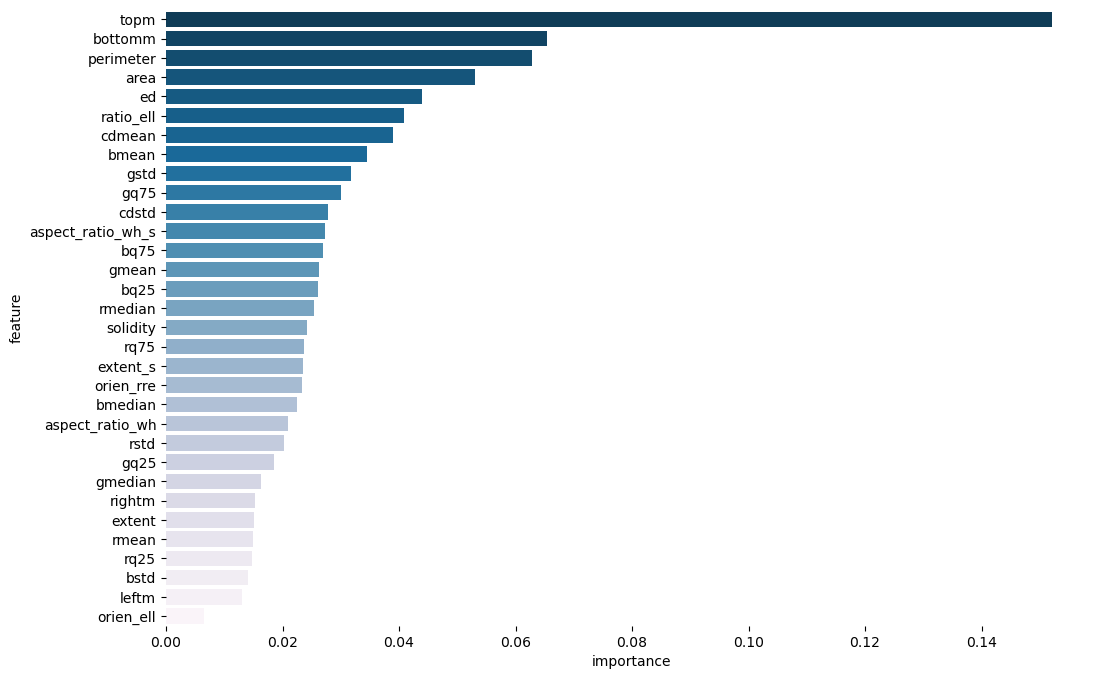

In [174]:
plt.figure(figsize = (12,8))
feature_name = list(dfi.columns.values.tolist())
importances = rfi.feature_importances_
df_rfi = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfi.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rfi['importances'], y = df_rfi['features'],
          palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
plt.savefig('rfimportance2_entropyground_new1.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [247]:
# joblib.dump(rfi, "my_random_forest_3_ground7.joblib")

['my_random_forest_3_ground7.joblib']

In [175]:
joblib.dump(rfi, "my_random_forest_3_ground7_new1.joblib")

['my_random_forest_3_ground7_new1.joblib']

#### For curb extraction

In [30]:
# Select only the bottom half of the images using threshold for topm
# Topm < 300
df_l = df.loc[df['topm'] >= 300]

In [31]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 1 to 3932
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               2160 non-null   int64  
 1   gmedian            2160 non-null   float64
 2   rmedian            2160 non-null   float64
 3   bmedian            2160 non-null   float64
 4   gmean              2160 non-null   float64
 5   rmean              2160 non-null   float64
 6   bmean              2160 non-null   float64
 7   gstd               2160 non-null   float64
 8   rstd               2160 non-null   float64
 9   bstd               2160 non-null   float64
 10  gq25               2160 non-null   float64
 11  gq75               2160 non-null   float64
 12  rq25               2160 non-null   float64
 13  rq75               2160 non-null   float64
 14  bq25               2160 non-null   float64
 15  bq75               2160 non-null   float64
 16  cdmean             2160 non-n

In [32]:
df_l.describe()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,ratio_ell,perimeter,is_cen_inside,is_mce_inside,leftm,rightm,topm,bottomm,Nr,labelgroup_index
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,...,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2160.000000
mean,29.504167,101.491898,91.419907,104.593287,103.164468,93.346835,106.074614,30.609810,30.185899,31.094619,...,6.221766,269.460631,0.986111,0.970370,275.307407,364.743981,366.888426,421.297222,9.990005e+14,3.542130
std,18.870196,54.958958,52.067565,59.101944,50.497141,48.062135,54.528827,16.290779,16.165381,16.067920,...,17.251650,395.421201,0.151545,0.239754,200.943585,201.579630,71.324705,97.855394,5.870120e+07,1.244937
min,1.000000,1.000000,4.000000,2.000000,2.936775,5.470320,5.073171,2.878821,3.148867,3.459970,...,1.009687,14.828427,-1.000000,-1.000000,0.000000,9.000000,300.000000,310.000000,9.990005e+14,0.000000
25%,15.000000,59.000000,47.500000,57.000000,64.278208,54.752609,61.834179,18.014118,17.833800,18.684179,...,1.659351,75.698484,1.000000,1.000000,81.750000,193.000000,321.000000,348.000000,9.990005e+14,2.000000
50%,27.000000,95.750000,88.000000,95.000000,99.669260,92.245829,99.928106,28.196499,27.346721,28.928715,...,2.678092,128.740114,1.000000,1.000000,274.000000,365.000000,342.000000,384.000000,9.990006e+14,4.000000
75%,40.000000,140.625000,127.000000,145.625000,138.364375,126.581584,142.832389,39.691307,38.858509,40.078818,...,4.913729,252.219299,1.000000,1.000000,453.000000,556.500000,387.000000,464.000000,9.990006e+14,4.000000
max,106.000000,249.000000,252.000000,245.000000,244.270833,243.297883,241.957633,98.309030,98.262223,98.221301,...,487.911969,2572.118959,1.000000,1.000000,630.000000,639.000000,625.000000,639.000000,9.990006e+14,6.000000


In [33]:
df_l.loc[(df_l.label_group == 'means_of_transportation'), 'label_group'] = 'other'

In [34]:
df_l.loc[(df_l.label_group == 'building'), 'label_group'] = 'other'

In [35]:
# df_ = df_new.drop(['area', 'ed', 'perimeter'], axis=1)
le = LabelEncoder()
df_l['labelgroup_index'] = le.fit_transform(df_l['label_group'])
y = df_l['label_group']
y = le.transform(y)

/sctmp/yelhe/ipykernel_817465/1287439127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['labelgroup_index'] = le.fit_transform(df_l['label_group'])


In [36]:
# df.head()

In [37]:
df2= df_l
df2.groupby(['label_group','labelgroup_index']).size().reset_index().rename(columns={0:'count'})

,label_group,labelgroup_index,count
0,curb,0,49
1,infrastructure,1,535
2,other,2,1355
3,vegetation,3,221


In [38]:
# 0 building; 1 curb; 2 infrastructure;
# 3 other; 4 sky; 5 vegetation

# Updated for lower part
# 0 building; 1 curb; 2 infrastructure;
# 3 other; 4 vegetation

# 0 curb; 1 infrastructure;
# 2 other; 3 vegetation


In [39]:
dfc = df_l
# Drop info columns
dfc = dfc.drop(['label', 'Nr', 'label_group', 'mask', 'labelgroup_index'], axis = 1)
# Drop variables which don't help much
dfc = dfc.drop(['isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm', 'topm'], axis = 1)

In [40]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 1 to 3932
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            2160 non-null   float64
 1   rmedian            2160 non-null   float64
 2   bmedian            2160 non-null   float64
 3   gmean              2160 non-null   float64
 4   rmean              2160 non-null   float64
 5   bmean              2160 non-null   float64
 6   gstd               2160 non-null   float64
 7   rstd               2160 non-null   float64
 8   bstd               2160 non-null   float64
 9   gq25               2160 non-null   float64
 10  gq75               2160 non-null   float64
 11  rq25               2160 non-null   float64
 12  rq75               2160 non-null   float64
 13  bq25               2160 non-null   float64
 14  bq75               2160 non-null   float64
 15  cdmean             2160 non-null   float64
 16  cdstd              2160 non-n

In [41]:
X = dfc
y = y

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

### Random Forest

In [42]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, 
                                                    test_size = 0.28, 
                                                    random_state = 10)
X_train3.shape, X_test3.shape


((1555, 29), (605, 29))

In [45]:
# rf = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf = joblib.load("my_random_forest_1.joblib")
rf.fit(X_train3, y_train3)
y_pred_rf = rf.predict(X_test3)

In [46]:
# print(y_pred_rf)
# print(y_test3)
print("Train data accuracy:",accuracy_score(y_true = y_train3, y_pred = rf.predict(X_train3)))
print("Test data accuracy:",accuracy_score(y_true = y_test3, y_pred = y_pred_rf))

Train data accuracy: 0.9884244372990354
Test data accuracy: 0.8380165289256198


[[  7   3   1   0]
 [  2 121  38   0]
 [  0  19 341   8]
 [  0   0  27  38]]


<Figure size 1200x800 with 0 Axes>

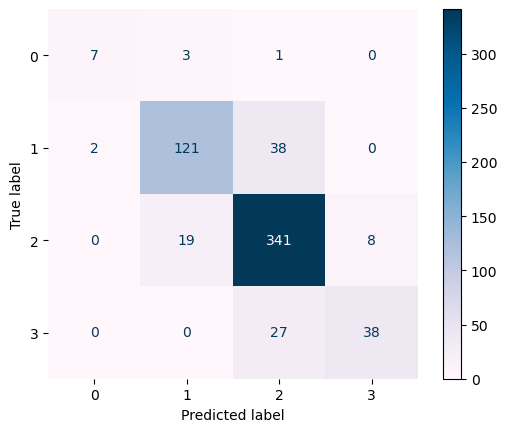

In [95]:
plt.figure(figsize = (12,8))
confusion_matrix_rf = metrics.confusion_matrix(y_test3, y_pred_rf)
print(confusion_matrix_rf)
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
cm_display_rf.plot(cmap = 'PuBu')
plt.box(False)
plt.savefig('cm_0_curbextraction.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [92]:
acc_rf = metrics.accuracy_score(y_test3, y_pred_rf)
print('accuracy', acc_rf)

pre_rf0 = metrics.precision_score(y_test3, y_pred_rf, average = 'micro')
print('precision_all', pre_rf0)

pre_rf1 = metrics.precision_score(y_test3, y_pred_rf, average = 'weighted')
print('precision_all', pre_rf1)

pre_rf = metrics.precision_score(y_test3, y_pred_rf, average = None)
print('precision', pre_rf)

senrec_rf0 = metrics.recall_score(y_test3, y_pred_rf, average = 'micro')
print('sensitivity recall all', senrec_rf0)

senrec_rf1 = metrics.recall_score(y_test3, y_pred_rf, average = 'weighted')
print('sensitivity recall all', senrec_rf1)


senrec_rf = metrics.recall_score(y_test3, y_pred_rf, average = None)
print('sensitivity recall', senrec_rf)

f1_rf0 = metrics.f1_score(y_test3, y_pred_rf,  average = 'micro')
print('f1 score all', f1_rf0)

f1_rf1 = metrics.f1_score(y_test3, y_pred_rf,  average = 'weighted')
print('f1 score all', f1_rf1)

f1_rf = metrics.f1_score(y_test3, y_pred_rf, average = None)
print('f1 score', f1_rf)

# y_pred_roc = np.transpose([pred[:, 1] for pred in y_pred_rf])
# auc_rf = metrics.roc_auc_score(y_test3, y_pred_roc, average = None)
# print('roc auc score', auc_rf)

mcc_rf = metrics.matthews_corrcoef(y_test3, y_pred_rf)
print('mcc score', mcc_rf)

ka_rf = metrics.cohen_kappa_score(y_test3, y_pred_rf)
print('kappa', ka_rf)

accuracy 0.8380165289256198
precision_all 0.8380165289256198
precision_all 0.8376963657596068
precision [0.77777778 0.84615385 0.83783784 0.82608696]
sensitivity recall all 0.8380165289256198
sensitivity recall all 0.8380165289256198
sensitivity recall [0.63636364 0.7515528  0.92663043 0.58461538]
f1 score all 0.8380165289256198
f1 score all 0.8334032697334132
f1 score [0.7        0.79605263 0.88       0.68468468]
mcc score 0.6934354948192504
kappa 0.688172212667708


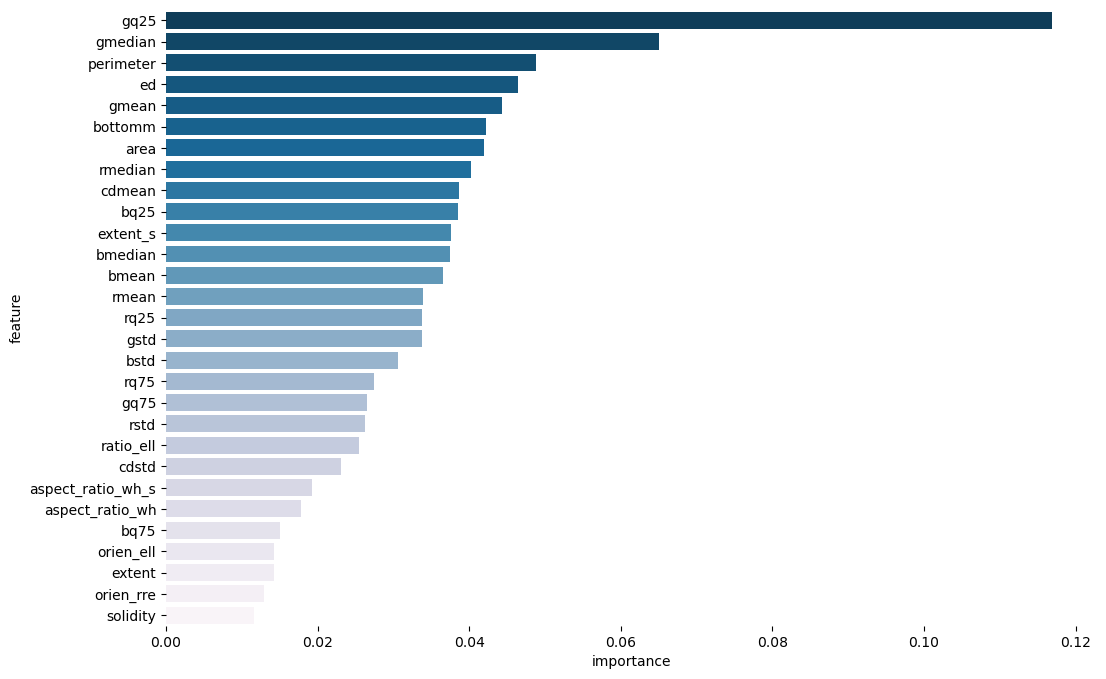

In [70]:
plt.figure(figsize = (12,8))
feature_name = list(dfc.columns.values.tolist())
importances = rf.feature_importances_
df_rf = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf['importances'], y = df_rf['features'], 
           palette = "PuBu_r")
plt.xlabel('importance')
plt.ylabel('feature')
plt.box(False)
plt.savefig('rfimportance0.png', dpi = 300, edgecolor = None, 
             transparent = True, bbox_inches = 'tight')

In [62]:
joblib.dump(rf, "my_random_forest_1.joblib")

['my_random_forest_1.joblib']

### Correlation Matrix

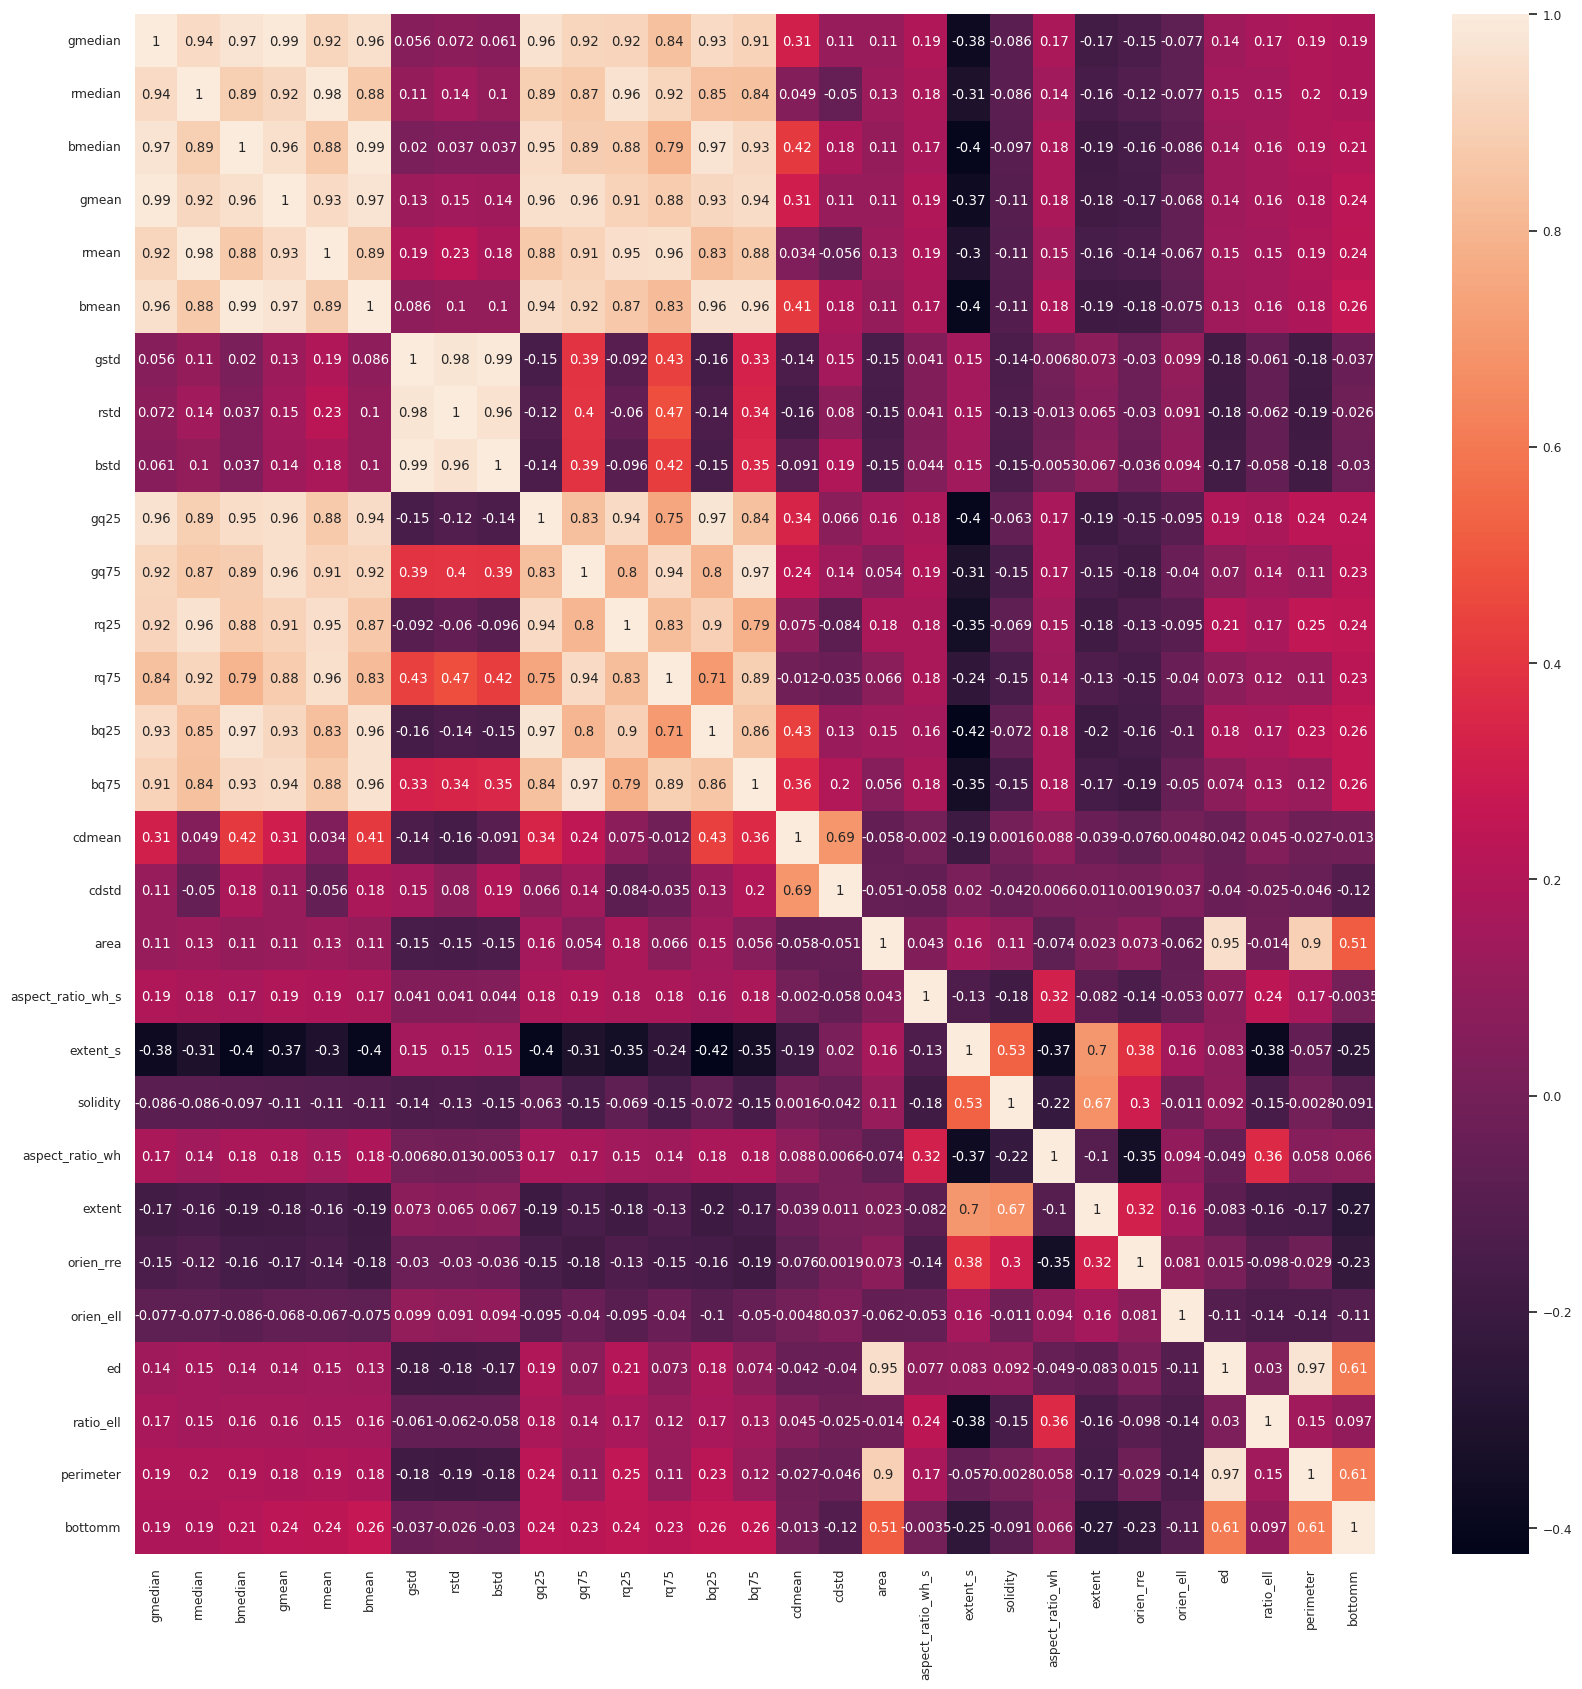

In [75]:
corr_matrix = dfc.corr()
plt.figure(figsize=(20,20))
sn.set(font_scale = 0.8)
sn.heatmap(corr_matrix, annot = True)
# plt.savefig('fig_corrmat_low_u1.png')
plt.show()